In [1]:
!pip install aed-utilities

  Preparing metadata (setup.py) ... done
  Created wheel for aed-utilities: filename=aed_utilities-0.5.6-py3-none-any.whl size=4542 sha256=bd7fdb79f71e3ee57db4110139004d5ff0761efddfebbe736a9acb729b6acfbf
  Stored in directory: /Users/felipe/Library/Caches/pip/wheels/e2/87/f8/223d5e6792e7b0fc909ef2cdb96ceb6a5336f428bc8eea7ffa
Successfully built aed-utilities


# Estructuras de datos elementales

Los sistemas o m√©todos de organizaci√≥n de datos que permiten un almacenamiento eficiente de la informaci√≥n en la memoria del computador son conocidos como estructuras de datos. Estos m√©todos de organizaci√≥n constituyen las piezas b√°sicas para la construcci√≥n de algoritmos complejos, y permiten implementarlos de manera eficiente.

En el presente cap√≠tulo se presentan las estructuras de datos b√°sicas como son arreglos, listas enlazadas y √°rboles, con las cuales se implementar√°n posteriormente los _tipos de datos abstractos_.

## Arreglos

Un arreglo es una secuencia contigua en memoria, que almacena un n√∫mero fijo de elementos homog√©neos. En la siguiente figura se muestra un arreglo de enteros con 10 elementos:

![ejemplo-arreglo](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/ejemplo-arreglo.png?raw=1)

Una ventaja que tienen los arreglos es que el costo de acceso a un elemento dado del arreglo es constante, es decir no hay diferencias de costo entre accesar el primer, el √∫ltimo o cualquier elemento del arreglo, lo cual es muy eficiente. La desventaja es que es necesario definir a priori el tama√±o del arreglo, lo cual puede generar mucha p√©rdida de espacio en memoria si se definen arreglos muy grandes para contener conjuntos peque√±os de elementos.

Esta caracter√≠stica de costo de acceso constante es esencial para la eficiencia de algunos algoritmos muy importantes, como por ejemplo el siguiente:

### Ejemplo: B√∫squeda Binaria

Supongamos que queremos buscar un elemento $x$ en un arreglo $a$ de tama√±o $n$. Si no tenemos m√°s informaci√≥n sobre el orden de los elementos dentro del arreglo, lo √∫nico que podemos hacer es una *b√∫squeda secuencial*, la cual tiene costo $\Theta(n)$ tanto en el peor caso como en el caso promedio.

Pero si sabemos que los elementos est√°n en orden ascendente, existe una forma mucho m√°s eficiente, llamada *b√∫squeda binaria*.

La idea es comparar primero $x$ conta el elemento del centro del arreglo. Si tenemos suerte, lo encontramos ah√≠, pero incluso si no tenemos suerte, podemos de inmediato descartar la mitad del arreglo. En efecto, si $x$ es mayor que el elemento del centro, entonces basta seguir buscando en la segunda mitad. De la misma manera, si $x$ es menor, basta seguir buscando en la primera mitad.

## B√∫squeda binaria - versi√≥n recursiva

In [1]:
import numpy as np
a=np.array([12,25,29,34,45,53,59,67,86,92])

In [3]:
# B√∫squeda binaria, versi√≥n recursiva
# busca x en el arreglo a, retorna sub√≠ndice o -1 si no est√°
def bbin(x,a):

    # puntapi√© inicial
    n=len(a)

    # vamos a utilizar una funci√≥n auxiliar, que se define fuera de 
    # esta funci√≥n bbin
    return bbin_rec(x,a,0,n-1)

# Definimos una funci√≥n auxiliar para
# buscar en el subarreglo a[i],...,a[j]
def bbin_rec(x,a,i,j):
    if i>j:
        return -1
    k=(i+j)//2
    if x==a[k]:
        return k
    if x<a[k]:
        return bbin_rec(x,a,i,k-1)
    else:
        return bbin_rec(x,a,k+1,j)

In [4]:
print(bbin(12,a), bbin(53,a), bbin(92,a), bbin(30,a))

0 5 9 -1


## B√∫squeda binaria - versi√≥n iterativa (con bucle/ciclo)

In [ ]:
# B√∫squeda binaria, versi√≥n iterativa
# busca x en el arreglo a, retorna sub√≠ndice o -1 si no est√°
def bbin(x,a):
    n=len(a)
    i=0
    j=n-1
    while i<=j:
        k=(i+j)//2
        if x==a[k]:
            return k
        if x<a[k]:
            j=k-1
        else:
            i=k+1
    return -1

In [ ]:
print(bbin(12,a), bbin(53,a), bbin(92,a), bbin(30,a))

0 5 9 -1


Podemos estimar r√°pidamente la eficiencia de este algoritmo si vemos que para hacer una b√∫squeda en un conjunto de tama√±o $n$, despu√©s de accesar el elemento del medio, en el peor caso continuamos buscando en un conjunto de tama√±o aproximadamente igual a la mitad:

$$
T(n)=1+T\left(\frac{n}{2}\right)
$$

Aplicando el Teorema Maestro con $p=1$, $q=2$, $r=0$, vemos que $T(n)=\Theta(\log{n})$.
Por lo tanto, gracias a que el arreglo est√° ordenado, una b√∫squeda binaria es mucho m√°s eficiente que una b√∫squeda secuencial.

La ecuaci√≥n anterior nos permite obtener una estimaci√≥n r√°pida, pero no refleja de manera totalmente exacta lo que ocurre en el algoritmo.
Si queremos modelar de manera precisa lo que ocurre en el peor caso, la ecuaci√≥n correcta es

$$
\begin{align}
T(n) &= 1 + T\left(\left\lceil\frac{n-1}{2}\right\rceil\right)\\
T(1) &= 1
\end{align}
$$

donde la notaci√≥n "techo" $\lceil x\rceil$ denota el menor entero mayor o igual a $x$ (y, similarmente, la notaci√≥n "piso" $\lfloor x \rfloor$ denota el mayor entero menor o igual a $x$).

Si tabulamos el valor de la funci√≥n $T(n)$ para los primeros valores de $n$, tenemos:

| $ùëõ$  | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| $T(n)$ | 1 | 2 | 2 | 3 | 3 | 3 | 3 | 4 | 4 | 4 | 4 | 4 | 4 | 4 | 4 |5 | 5 |

Observando esta tabla, no es dif√≠cil adivinar la soluci√≥n:

$$
T(n) = \lceil \log_2{(n+1)} \rceil
$$

---

### Una manera m√°s eficiente de programar la b√∫squeda binaria

En el an√°lisis anterior, hemos considerado que en cada iteraci√≥n, el costo de accesar el elemento $a[k]$ es igual a $1$, representando as√≠ el costo total de comparar primero con`==`y luego con `<`.
Si quisi√©ramos hacer una contabilidad m√°s precisa, deber√≠amos decir que ese costo es en realidad de $2$ comparaciones por cada iteraci√≥n.
A continuaci√≥n veremos que es posible reducir eso a $1$ comparaci√≥n por ciclo, si utilizamos comparaciones de tipo `<=`:

In [ ]:
# B√∫squeda binaria, versi√≥n iterativa y con <=
# busca x en el arreglo a, retorna sub√≠ndice o -1 si no est√°
def bbin(x,a):
    n=len(a)
    i=0
    j=n-1
    while i<j: # conjunto tiene al menos 2 elementos
        k=(i+j)//2
        if x<=a[k]:
            j=k    # x estar√≠a en a[i],...,a[k]
        else:
            i=k+1  # x estar√≠a en a[k+1],...,a[j]
    # al terminar, el conjunto factible se ha reducido a 0 o 1 elemento
    if i==j and x==a[i]:
        return i
    else:
        return -1

In [ ]:
print(bbin(12,a), bbin(53,a), bbin(92,a), bbin(30,a))

0 5 9 -1


En esta versi√≥n logramos ahorrar una comparaci√≥n de elementos por iteraci√≥n, al precio de que toda las b√∫squedas ahora hacen el m√°ximo de iteraciones, a diferencia del algoritmo original, en donde si ten√≠amos suerte el algoritmo buscado se podr√≠a encontrar en las primeras iteraciones.

Este es un precio que vale la pena pagar, porque en el algoritmo original son muy pocos los casos en que la b√∫squeda termina tempranamente, y en la gran mayor√≠a de los casos igual se hace un n√∫mero de iteraciones muy cercano al m√°ximo.

## Estructuras enlazadas

Como hemos visto, los arreglos permiten que algunos algoritmos se puedan programar de manera muy eficiente, pero las estructuras basadas en arreglos suelen ser muy r√≠gidas.
Por ejemplo, si quisi√©ramos agregar un nuevo elemento al arreglo ordenado en que se hace b√∫squeda binaria (suponiendo que hubiera holgura suficiente), la inserci√≥n tomar√≠a tiempo $\Theta(n)$ tanto en el peor caso como en promedio, por la necesidad de preservar el orden de los elementos.

Veremos a continuaci√≥n que podemos dise√±ar estructuras mucho m√°s flexibles sin hacemos uso de la capacidad de definir clases de objetos que contienen dentro de sus campos referencias (tambi√©n llamadas "punteros") a otros objetos.

## Listas de enlace simple

Comenzaremos viendo la estructura m√°s sencilla de este tipo: una secuencia de nodos, en que cada uno contiene una referencia al siguiente de la lista. Consideremos nodos compuestos de dos *campos* (o *atributos*): `info` y `sgte`. El primero almacena el elemento de la secuencia, y el segundo apunta al siguiente nodo. Por ejemplo, un nodo que almacena el valor $42$ y que apunta al siguiente nodo se puede representar gr√°ficamente as√≠:

![Nodo](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo.png?raw=1)

O, m√°s simplemente:

![Nodo-circular](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo-circular.png?raw=1)

Para definir el formato de estos nodos utilizaremos la siguiente definici√≥n de clase, la que incluye un constructor para inicializar sus campos al crear un objeto:

In [ ]:
class Nodo:
    def __init__(self, info, sgte=None):
        self.info=info
        self.sgte=sgte

In [ ]:
p=Nodo(42)
print(p.info, p.sgte)

42 None


El siguiente trozo de programa muestra la construcci√≥n de una lista con 4 elementos: $42$, $65$, $13$ y $44$, y un ejemplo simple de uso:

In [ ]:
primero=Nodo(42,Nodo(65,Nodo(13,Nodo(44))))
p=primero
while p is not None:
    print(p.info, end=" ")
    p=p.sgte
print()

42 65 13 44 


Algo adicional respecto de la representaci√≥n gr√°fica. Cuando una referencia es nula (`None`), es tradicional representarla como "conectada a tierra":

![Nodo-None](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo-None.png?raw=1)

Al usar la representaci√≥n con nodos circulares, la ausencia de un nodo siguiente la podemos representar simplemente por la ausencia de la flecha saliente:

![Nodo-circular-None](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo-circular-None.png?raw=1)

O, si queremos hacer expl√≠cita la ausencia de un nodo siguiente (o, en otras palabras, que el puntero al nodo siguiente es nulo), podemos representarlo por un nodo cuadrado, que es una convenci√≥n que nos resultar√° muy conveniente m√°s adelante, al ver *√°rboles*:

![Nodo-circular-cuadrado](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo-circular-cuadrado.png?raw=1)

Con esta √∫ltima convenci√≥n, la lista que construimos en el ejemplo anterior, se visualizar√≠a as√≠:

![lista-ejemplo](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/lista-ejemplo.png?raw=1)

A continuaci√≥n definiremos una clase `Lista`, que contendr√° el puntero al primer nodo de la lista, as√≠ como la funcionalidad que necesitamos para operar sobre la lista:

In [ ]:
import aed_utilities as aed

class Lista:
    def __init__(self):
        self.primero=None

    def insertar_al_inicio(self,info):
        self.primero=Nodo(info,self.primero)

    def insertar_despues_de(self,p,info): # inserta despu√©s de nodo p
        p.sgte=Nodo(info,p.sgte)

    def eliminar_al_inicio(self):
        assert self.primero is not None
        self.primero=self.primero.sgte

    def eliminar_sgte_de(self,p): # elimina el nodo siguiente de p
        assert p.sgte is not None
        p.sgte=p.sgte.sgte

    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.primero
        j=1
        while p is not None:
            if j==k:
                return p
            p=p.sgte
            j+=1
        return None

    def imprimir(self):
        p=self.primero
        while p is not None:
            print(p.info, end=" ")
            p=p.sgte
        print()

    #M√©todo para dibujar una lista enlazada.
    # - Se crea una instancia de la clase LinkedListDrawer. Este objeto necesita conocer c√≥mo se llaman los
    #   campos de la estructura de los nodos de la lista. Para eso sirven los par√°metros:
    #     - fieldHeader: nombre del campo en la lista con el primer puntero de la lista
    #     - fieldData: nombre del campo en el nodo que almacena la data
    #     - fieldLink: nombre del campo en el nodo que almacena el puntero
    #     - strHeader: cadena de texto que representa la cabecera de la lista
    # - Para dibujar se llama al m√©todo "draw_linked_list" con la lista como par√°metro

    def dibujar(self):
      lld = aed.LinkedListDrawer(fieldHeader="primero", fieldData="info", fieldLink="sgte", strHeader="primero")
      lld.draw_linked_list(self)

In [ ]:
L=Lista()
L.insertar_al_inicio(44)
L.insertar_al_inicio(13)
L.insertar_al_inicio(65)
L.insertar_al_inicio(42)
L.imprimir()

42 65 13 44 


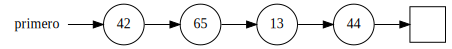

In [ ]:
L.dibujar()

42 65 88 13 44 


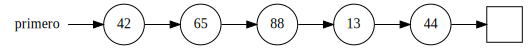

In [ ]:
L.insertar_despues_de(L.k_esimo(2),88)
L.imprimir()
L.dibujar()

65 88 13 44 


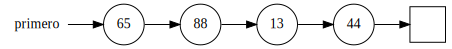

In [ ]:
L.eliminar_al_inicio()
L.imprimir()
L.dibujar()

65 13 44 


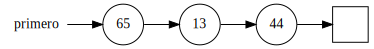

In [ ]:
L.eliminar_sgte_de(L.k_esimo(1))
L.imprimir()
L.dibujar()

---

Hay algunas cosas que no resultan muy elegantes en el dise√±o de listas que estamos considerando hasta el momento.

Una de ellas es que para eliminar un elemento, no se pueda indicar al elemento que se desea eliminar, sino que haya que indicar al previo. Esto es inevitable, dado el caracter unidireccional de los enlaces, y m√°s adelante, cuando veamos _listas de doble enlace_ veremos que eso puede mejorarse.

Otro punto molesto en la interfaz de uso es la necesidad de distinguir entre si se opera al comienzo de la lista, o en un punto interior. Esto es porque las operaciones afectan al elemento previo, y el primero de la lista, por definici√≥n, no tiene un elemento previo.

Esto puede subsanarse, sin embargo, introduciendo un nodo "cabecera" ("*header*") al comienzo de la lista. Este nodo no contiene informaci√≥n √∫til y para todos los efectos es como si no existiera, excepto que sirve como el previo del primer nodo real de la lista. Para poder ubicarlo, lo identificaremos con el nodo "0-√©simo" de la lista.

![lista-ejemplo-con-cabecera](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/lista-ejemplo-con-cabecera.png?raw=1)

A continuaci√≥n reescribimos nuestra definici√≥n de la clase `Lista` y sus ejemplos de uso, bajo el supuesto de que existe un nodo cabecera.

In [ ]:
class Lista_con_cabecera:
    def __init__(self):
        self.cabecera=Nodo(0,None)

    def insertar_despues_de(self,p,info): # inserta despu√©s de nodo p
        p.sgte=Nodo(info,p.sgte)

    def eliminar_sgte_de(self,p): # elimina el nodo siguiente de p
        assert p.sgte is not None
        p.sgte=p.sgte.sgte

    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.cabecera
        j=0
        while True:
            if j==k:
                return p
            p=p.sgte
            if p is None:
                return None
            j+=1

    def imprimir(self):
        p=self.cabecera.sgte
        while p is not None:
            print(p.info,end=" ")
            p=p.sgte
        print()

In [ ]:
L=Lista_con_cabecera()
L.insertar_despues_de(L.k_esimo(0),42)
L.insertar_despues_de(L.k_esimo(1),65)
L.insertar_despues_de(L.k_esimo(2),13)
L.insertar_despues_de(L.k_esimo(3),44)
L.imprimir()

42 65 13 44 


In [ ]:
L.eliminar_sgte_de(L.k_esimo(0)) # eliminar el primero
L.imprimir()

65 13 44 


In [ ]:
print(L.k_esimo(7))

None


In [ ]:
L.eliminar_sgte_de(L.k_esimo(1)) # eliminar un elemento en el medio
L.imprimir()

65 44 


### Recorriendo la lista con un iterador

A continuaci√≥n veremos c√≥mo, en lugar de imprimir la lista, podemos implementar un iterador que vaya entregando los elementos de la lista cada vez que es llamado:

In [ ]:
class Lista_con_cabecera:
    def __init__(self):
        self.cabecera=Nodo(0,None)

    def insertar_despues_de(self,p,info): # inserta despu√©s de nodo p
        p.sgte=Nodo(info,p.sgte)

    def eliminar_sgte_de(self,p): # elimina el nodo siguiente de p
        assert p.sgte is not None
        p.sgte=p.sgte.sgte

    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.cabecera
        j=0
        while p is not None:
            if j==k:
                return p
            p=p.sgte
            j+=1
        return None

    def valores(self):
        p=self.cabecera.sgte
        while p is not None:
            yield p.info
            p=p.sgte

In [ ]:
L=Lista_con_cabecera()
L.insertar_despues_de(L.k_esimo(0),42)
L.insertar_despues_de(L.k_esimo(1),65)
L.insertar_despues_de(L.k_esimo(2),13)
L.insertar_despues_de(L.k_esimo(3),44)

In [ ]:
for x in L.valores():
    print(x, end=" ")
print()

42 65 13 44 


In [ ]:
print([x for x in L.valores()])

[42, 65, 13, 44]


## Listas de doble enlace

Las listas de enlace simple permiten solo procesos unidireccionales, por lo que no son muy apropiadas cuando los procesos necesitan poder recorrerlas en ambas dicecciones.

Podemos mejorar esto si agregamos a los nodos una referencia al nodo *previo*, adem√°s del nodo siguiente:

![Nodo-doble](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo-doble.png?raw=1)



In [ ]:
class Nodo:
    def __init__(self, prev, info, sgte):
        self.prev=prev
        self.info=info
        self.sgte=sgte

Con este tipo de nodos podemos formar una lista que puede ser recorrida en ambas direcciones.
Por consideraciones similares a las anteriores, resulta conveniente agregar un nodo cabecera en cada extremo, pero en realidad un mismo nodo puede jugar ambos roles, con lo cual la lista adopta un aspecto f√≠sicamente circular, aunque desde un punto de vista conceptual no lo sea:

![lista-ejemplo-doble-enlace](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/lista-ejemplo-doble-enlace.png?raw=1)

La siguiente es una definici√≥n de lista de doble enlace, con alguna de la funcionalidad que ella permite:

In [ ]:
import aed_utilities as aed

class Lista_doble_enlace:
    def __init__(self):
        self.cabecera=Nodo(None,0,None)
        self.cabecera.prev=self.cabecera
        self.cabecera.sgte=self.cabecera

    def insertar_despues_de(self,p,info): # inserta despu√©s de nodo p
        r=p.sgte
        p.sgte=r.prev=Nodo(p,info,r)

    def eliminar(self,p): # elimina el nodo p
        assert p is not self.cabecera
        (p.prev.sgte,p.sgte.prev)=(p.sgte,p.prev)

    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.cabecera
        j=0
        while True:
            if j==k:
                return p
            p=p.sgte
            if p is self.cabecera:
                return None
            j+=1

    def ascendente(self):
        p=self.cabecera.sgte
        while p is not self.cabecera:
            yield p.info
            p=p.sgte

    def descendente(self):
        p=self.cabecera.prev
        while p is not self.cabecera:
            yield p.info
            p=p.prev

    #Para dibujar una lista doblemente enlazada, es necesario adem√°s definir el nombre del campo del puntero hacia atr√°s.
    # El par√°metro para definir ese campo es "fieldReverseLink". Por default, este campo es None.
    def dibujar(self):
      lld=aed.LinkedListDrawer(fieldHeader="cabecera", fieldData="info", fieldLink="sgte", fieldReverseLink="prev")
      lld.draw_double_linked_list(self)

[42, 65, 13, 44]
[44, 13, 65, 42]


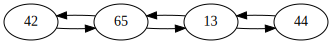

In [ ]:
L=Lista_doble_enlace()
L.insertar_despues_de(L.k_esimo(0),42)
L.insertar_despues_de(L.k_esimo(1),65)
L.insertar_despues_de(L.k_esimo(2),13)
L.insertar_despues_de(L.k_esimo(3),44)
print([x for x in L.ascendente()])
print([x for x in L.descendente()])

L.dibujar()

[42, 65, 44]


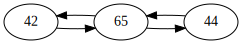

In [ ]:
L.eliminar(L.k_esimo(3))
print([x for x in L.ascendente()])

L.dibujar()

---

## √Årboles Binarios

Al usar nodos que hacen referencia a otros nodos, no es de ninguna manera obligatorio limitarse a estructuras lineales como las que hemos visto en las secciones anteriores: podemos construir estructuras enlazadas tan complejas como queramos.

Un tipo de estructura muy utilizada son los *√°rboles binarios*, en que cada nodo puede tener "hijos" tanto a su izquierda como a si derecha, y eso mismo se reproduce para los hijos, recursivamente.

Los nodos tienen un formato similar al de los nodos de doble enlace, pero las referencias se llaman `izq` (izquierda) y `der` (derecha).

![Nodo-arbol-binario](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo-arbol-binario.png?raw=1)

Al dibujarlo con nodos circulares, normalmente las l√≠neas no llevan flecha, porque se entiende que apuntan hacia abajo:

![Nodo-arbol-binario-circular](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Nodo-arbol-binario-circular.png?raw=1)

In [2]:
class Nodo:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der

La siguiente figura muestra un ejemplo de un √°rbol binario:

![ejemplo-ABB](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/ejemplo-ABB.png?raw=1)

Este es un tipo especial de √°rbol binario, llamado *√°rbol de b√∫squeda binaria* (*ABB*), que se caracteriza porque para cada nodo, sus hijos descendientes hacia la izquierda son menores que √©l, y los de la derecha son mayores. M√°s adelante estudiaremos en profundidad los ABB.

La terminolog√≠a asociada a los √°rboles combina lo forestal con lo geneal√≥gico. El nodo de nivel superior se llama la *ra√≠z* y los nodos que est√°n en los niveles inferiores (los nodos cuadrados en la figura) se llaman *hojas*. Como vemos, al rev√©s que en la naturaleza, estos √°rboles crecen hacia abajo.

Un nodo apunta hacia abajo a sus hijos (izquierdo y derecho), y se dice que es el *padre* de ellos. Yendo desde un nodo hacia abajo se encuentran sus *descendientes*, y hacia arriba se encuentran sus *ancestros*.

Si el nodo $b$ es descendiente del nodo $a$, se dice que la distancia entre $a$ y $b$ es el n√∫mero de pasos que hay que dar para ir de $a$ a $b$. La m√°xima distancia entre la ra√≠z y una hoja se llama la *altura* del √°rbol. En el ejemplo, la altura es $5$, que se alcanza yendo desde la ra√≠z hasta cualquiera de las hojas hijas de $65$ o de $81$.

Al dibujar un √°rbol con nodos circulares y nodos cuadrados, los circulares se llaman *nodos internos* y los cuadrados, *nodos externos*. Los nodos internos siempre tienen dos hijos (internos y/o externos) y los nodos externos no tienen hijos.

La altura m√°xima de un √°rbol binario con $n$ nodos internos es $n$, y la altura m√≠nima es $\lceil \log_2{(n+1)} \rceil$. Esto √∫ltimo es una consecuencia de que un √°rbol binario de altura $h$ puede tener a lo m√°s $2^h$ nodos externos.

A continuaci√≥n definiremos una clase √°rbol, con un constructor que define un puntero al nodo ra√≠z. Para poder hacer ejemplos de uso, admitiremos que el constructor reciba un puntero a la ra√≠z de un √°rbol ya construido.

In [ ]:
class Arbol:
    def __init__(self,raiz=None):
        self.raiz=raiz

# Recursividad

_Para entender recursividad hay que entender recursividad_

Una funci√≥n se dice **recursiva**, si en su definici√≥n de llama a s√≠ misma.

Una **funci√≥n recursiva** consta de un caso base y de un caso recursivo.

In [ ]:
# Ej: fib(n): int -> int
# calcula el n-√©simo t√©rmino de la sucesi√≥n de Fibonacci
# Ej: fib(4) retorna 3 y fib(6) retorna 8

def fib(n):
  # CASO BASE:
  if n<=2:
    return 1

  # CASO RECURSIVO
  else:
    return fib(n-1)+fib(n-2)

assert fib(4) == 3
assert fib(6) == 8


**IMPORTANTE**: El caso recursivo **debe** converger al caso base.

In [ ]:
# Ej: pot(x,n): int int -> int
# Calcula x elevado a n.
# Ej: pot(2,10) entrega 1024; pot(2,3) entrega 8.

def pot(x,n):
  # CASO BASE:
  if n == 0:
    return 1

  # CASO RECURSIVO:
  return x*pot(x,n-1)

assert pot(2,10) == 1024
assert pot(2,3) == 8

In [ ]:
# Ej: fact(x): int -> int
# calcula el factorial de x
# ej: fact(3) entrega 6, fact(10) entrega 3628800

def fact(x):

    # CASO BASE:
    if x == 0:
        return 1

    # CASO RECURSIVO:

    return x * fact(x-1)

assert fact(3) == 6
assert fact(10) == 3628800
print(fact(958))
#print(fact(1000000000000000000))




4023872600770937735437024339230039857193748642107146325437999104299385123986290205920442084869694048004799886101971960586316668729948085589013238296699445909974245040870737599188236277271887325197795059509952761208749754624970436014182780946464962910563938874378864873371191810458257836478499770124766328898359557354325131853239584630755574091142624174743493475534286465766116677973966688202912073791438537195882498081268678383745597317461360853795345242215865932019280908782973084313928444032812315586110369768013573042161687476096758713483120254785893207671691324484262361314125087802080002616831510273418279777047846358681701643650241536913982812648102130927612448963599287051149649754199093422215668325720808213331861168115536158365469840467089756029009505376164758477284218896796462449451607653534081989013854424879849599533191017233555566021394503997362807501378376153071277619268490343526252000158885351473316117021039681759215109077880193931781141945452572238655414610628921879602238389714760

RecursionError: maximum recursion depth exceeded in comparison

### Recorridos de √Årboles Binarios

Un √°rbol binario es una estructura esencialmente **recursiva**, y las principales formas de recorrer un √°rbol se definen tambi√©n recursivamente.
Los tres tipos de recorridos m√°s conocidos son:

* Preorden: Visitar la ra√≠z, recorrer el sub√°rbol izquierdo y recorrer el sub√°rbol derecho

* Indorden: Recorrer el sub√°rbol izquierdo, visitar la ra√≠z y recorrer el sub√°rbol derecho

* Postorden: Recorrer el sub√°rbol izquierdo, recorrer el sub√°rbol derecho y visitar la ra√≠z

A continuaci√≥n agregamos a la definici√≥n de la clase tres m√©todos que imprimen en contenido del √°rbol en estos recorridos:

In [3]:
import aed_utilities as aed

def pre(p):
    if p is not None:
        print(p.info,end=" ")
        pre(p.izq)
        pre(p.der)

def ino(p):
    if p is not None:
        ino(p.izq)
        print(p.info,end=" ")
        ino(p.der)

def post(p):
    if p is not None:
        post(p.izq)
        post(p.der)
        print(p.info,end=" ")

class Arbol:
    def __init__(self,raiz=None):
        self.raiz=raiz

    def preorden(self):
        print("Preorden:", end=" ")
        pre(self.raiz)
        print()

    def inorden(self):
        print("Inorden:", end=" ")
        ino(self.raiz)
        print()

    def postorden(self):
        print("Postorden:", end=" ")
        post(self.raiz)
        print()

    # ingresarValor: int -> None
    # ingresar el valor 'valor' al arbol, en el lugar que corresponde
    #
    def ingresarValor(self, valor):
        pass


    # Para dibujar un √°rbol binario, necesitamos crear una instancia de la clase BinaryTreeDrawer
    # Aqu√≠ tambi√©n necesitamos conocer la estructura de los nodos. Esta informaci√≥n se env√≠a como par√°metro
    # al constructor de la clase:
    #    - fieldData: nombre del campo del nodo que mantiene la data
    #    - fieldLeft: nombre del campo del nodo con el puntero izquierdo
    #    - fieldRight: nombre del campo del noso con le puntero derecho
    # Para dibujar se llama al m√©todo "draw_tree", enviando como par√°metro el √°rbol binario y el nombre del campo que identifica al nodo raiz.

    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der")
      btd.draw_tree(self, "raiz")


ModuleNotFoundError: No module named 'graphviz'

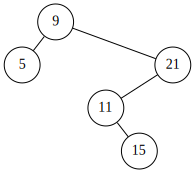

In [12]:
# nodo sin hijos e info = 9
n2 = Nodo(None, 9, None)
a = Arbol(n2)


n3 = Nodo(None, 21, None)
n2.der = n3


n4 = Nodo(None,11, None)
n3.izq = n4

n5 = Nodo(None,15, None)
n4.der = n5

n6 = Nodo(None, 5, None)
n2.izq = n6

a.dibujar()


In [1]:
AX=Arbol(
    Nodo(
        Nodo(
            Nodo(None,15,None),
            20,
            Nodo(
                Nodo(None,30,None),
                35,
                None
            )
        ),
        42,
        Nodo(
            Nodo(
                Nodo(
                    Nodo(Nodo(None,62, None),65,None),
                    72,
                    Nodo(None,81,None)
                ),
                90,
                None
            ),
            95,
            None
        )
       )
)

AX1 = Arbol(Nodo(Nodo(Nodo(None,7,None),10,Nodo(None, 12, None)),18, Nodo(Nodo(None, 20,None),24,Nodo(None, 30, None))))
AX2 = Arbol(Nodo(None, 10, Nodo(None, 12, Nodo(None, 14, Nodo(None, 20, None)))))
AX3 = Arbol(Nodo(Nodo(Nodo(None,5,None),7,Nodo(None, 9, None)),10,None))

NameError: name 'Arbol' is not defined

In [ ]:
AX.preorden()
AX.inorden()
AX.postorden()

Preorden: 42 20 15 35 30 95 90 72 65 62 81 
Inorden: 15 20 30 35 42 62 65 72 81 90 95 
Postorden: 15 30 35 20 62 65 81 72 90 95 42 


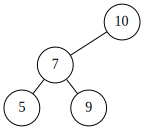

In [8]:
AX3.dibujar()

### Recorridos usando iteradores

Utilizando la instrucci√≥n ``yield`` podemos convertir estos m√©todos en iteradores, los cuales pueden ser utilizados desde una instrucci√≥n ``for``:

In [ ]:
class Nodo:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der

In [ ]:
def pre(p):
    if p is not None:
        yield p
        yield from pre(p.izq)
        yield from pre(p.der)

def ino(p):
    if p is not None:
        yield from ino(p.izq)
        yield p
        yield from ino(p.der)

def post(p):
    if p is not None:
        yield from post(p.izq)
        yield from post(p.der)
        yield p

class Arbol:
    def __init__(self,raiz=None):
        self.raiz=raiz

    def preorden(self):
        yield from pre(self.raiz)

    def inorden(self):
        yield from ino(self.raiz)

    def postorden(self):
        yield from post(self.raiz)

In [6]:
a=Arbol(
    Nodo(
        Nodo(
            Nodo(None,15,None),
            20,
            Nodo(
                Nodo(None,30,None),
                35,
                None
            )
        ),
        42,
        Nodo(
            Nodo(
                Nodo(
                    Nodo(None,65,None),
                    72,
                    Nodo(None,81,None)
                ),
                90,
                None
            ),
            95,
            None
        )
       )
)

In [ ]:
print ("Preorden:", [p.info for p in a.preorden()])
print ("Inorden:", [p.info for p in a.inorden()])
print ("Postorden:", [p.info for p in a.postorden()])

Preorden: [42, 20, 15, 35, 30, 95, 90, 72, 65, 81]
Inorden: [15, 20, 30, 35, 42, 65, 72, 81, 90, 95]
Postorden: [15, 30, 35, 20, 65, 81, 72, 90, 95, 42]


### Una representaci√≥n alternativa para √°rboles binarios

Un dise√±o alternativo para esta estructura se basa en darle una existencia real a los nodos externos, en lugar de que sean punteros `None`. Esto nos permite asociar funcionalidad a los nodos, lo cual ejemplificamos con el recorrido en inorden:

In [ ]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
    def inorden(self):
        self.izq.inorden()
        print(self.info, end=" ")
        self.der.inorden()

class Nodoe:
    def __init__(self):
        pass
    def inorden(self):
        pass

In [ ]:
import aed_utilities as aed

class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz

    def inorden(self):
        print("Inorden:", end=" ")
        self.raiz.inorden()
        print()

    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe)
      btd.draw_tree(self, "raiz")

In [ ]:
a=Arbol(
    Nodoi(
        Nodoi(
            Nodoi(Nodoe(),15,Nodoe()),
            20,
            Nodoi(
                Nodoi(Nodoe(),30,Nodoe()),
                35,
                Nodoe()
            )
        ),
        42,
        Nodoi(
            Nodoi(
                Nodoi(
                    Nodoi(Nodoe(),65,Nodoe()),
                    72,
                    Nodoi(Nodoe(),81,Nodoe())
                ),
                90,
                Nodoe()
            ),
            95,
            Nodoe()
        )
       )
)

In [ ]:
a.inorden()

Inorden: 15 20 30 35 42 65 72 81 90 95 


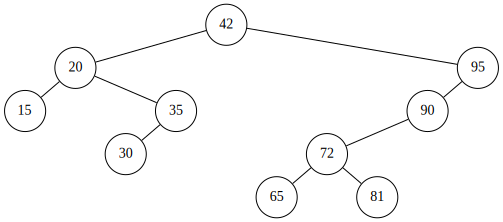

In [ ]:
a.dibujar()

### Recorrido usando iteradores

De la misma manera como lo hicimos antes, podemos usar la instrucci√≥n ``yield`` para entregar uno a uno los nodos que se van visitando. Ejemplificamos esto con el recorrido en inorden:

In [ ]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der

    def inorden(self):
        yield from self.izq.inorden()
        yield self
        yield from self.der.inorden()

class Nodoe:
    def __init__(self):
        pass

    def inorden(self):
        return
        yield None # no se ejecuta, permite que la funci√≥n sea un generator

In [ ]:
class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz

    def inorden(self):
        yield from self.raiz.inorden()

In [ ]:
a=Arbol(
    Nodoi(
        Nodoi(
            Nodoi(Nodoe(),15,Nodoe()),
            20,
            Nodoi(
                Nodoi(Nodoe(),30,Nodoe()),
                35,
                Nodoe()
            )
        ),
        42,
        Nodoi(
            Nodoi(
                Nodoi(
                    Nodoi(Nodoe(),65,Nodoe()),
                    72,
                    Nodoi(Nodoe(),81,Nodoe())
                ),
                90,
                Nodoe()
            ),
            95,
            Nodoe()
        )
       )
)

In [ ]:
print ("Inorden:", [p.info for p in a.inorden()])

Inorden: [15, 20, 30, 35, 42, 65, 72, 81, 90, 95]


## √Årboles para representar f√≥rmulas

La estructura de una f√≥rmula matem√°tica, por ejemplo la f√≥rmula

$$
(a+1)*\left(2-\frac{1}{b}\right)
$$

se puede representar mediante el √°rbol:

![arbol-formula](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/arbol-formula.png?raw=1)

Modifiquemos la definici√≥n de nodos externos para que puedan almacenar informaci√≥n en su interior y veamos el efecto de hacer un recorrido en postorden de un √°rbol de este tipo:

In [ ]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
    def postorden(self):
        self.izq.postorden()
        self.der.postorden()
        print(self.info, end=" ")

class Nodoe:
    def __init__(self, info=""):
        self.info=info
    def postorden(self):
        print(self.info, end=" ")

class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz

    def postorden(self):
        print("Postorden:", end=" ")
        self.raiz.postorden()
        print()

    def dibujar(self):
      btd = aed.BinaryTreeDrawer(fieldData="info", fieldLeft="izq", fieldRight="der", classNone=Nodoe)
      btd.draw_tree(self, "raiz")

In [ ]:
formula= Arbol(
            Nodoi(
                Nodoi(Nodoe("a"),"+",Nodoe("1")),
                "*",
                Nodoi(
                    Nodoe("2"),
                    "-",
                    Nodoi(Nodoe("1"),"/",Nodoe("b"))
                )
            )
        )


In [ ]:
formula.postorden()

Postorden: a 1 + 2 1 b / - * 


El resultado de este recorrido en postorden es la misma f√≥rmula escrita en *notaci√≥n polaca de postfijo* (tambi√©n llamada *notaci√≥n polaca reversa* o, m√°s simplemente, *notaci√≥n polaca*).
Esta notaci√≥n, inventada en 1924 por el l√≥gico polaco Jan ≈Åukasiewicz, se caracteriza porque el operador va a continuaci√≥n de los operandos, mientras que en la notaci√≥n usual (llamada de *infijo*) el operador va entre los operandos. Por ejemplo, la f√≥rmula "$a+b$" se escribe en notaci√≥n polaca como "$a b +$".

La notaci√≥n polaca tiene varias ventajas.
Una de ellas es que no necesita par√©ntesis. Por ejemplo, si no consideramos prioridad de operadores (que es una forma impl√≠cita de parentizar), la f√≥rmula "$a+b*c$" ser√≠a ambigua, porque podr√≠a significar "$(a+b)*c$" o "$a+(b*c)$". En notaci√≥n polaca no habr√≠a ambig√ºedad, porque la primera se escribir√≠a"$ab+c*$", y la segunda ser√≠a "$abc*+$".

Otra ventaja es que, como veremos m√°s adelante, una f√≥rmula en notaci√≥n polaca se puede evaluar en una sola pasada de izquierda a derecha haciendo uso de una estructura llamada *pila* o *stack*.

---

## Propiedades matem√°ticas de los √°rboles binarios


Los √°rboles binarios tienen muchas propiedades interesantes:

### Relaci√≥n entre nodos internos y externos

Sea $e_n$ el n√∫mero de nodos externos de un √°rbol binario con $n$ nodos internos. Entonces $e_n=n+1$

Esta propiedad se puede demostrar de varias maneras:

Demostraci√≥n 1:

Por inducci√≥n sobre el n√∫mero de nodos internos. La base es un √°rbol vac√≠o (`raiz==None`), para la cual $e_0=1$. Para el paso inductivo, consideremos un √°rbol con $n+1$ nodos internos. Ese √°rbol debe tener al menos un nodo interno cuyos dos hijos son nodos externos (o el √°rbol ser√≠a infinito). Tomemos el sub√°rbol constitu√≠do por ese nodo y sus dos hijos y reemplac√©moslo por un nodo externo. El √°rbol resultante tiene $n$ nodos y por lo tanto su n√∫mero de nodos externos es $n+1$, por hip√≥tesis de inducci√≥n. Deshagamos ahora el cambio efectuado: esto agrega 1 interno, y elimina 1 nodo externo pero agrega 2, de modo que el incremento neto en el n√∫mero de nodos externos es 1. Por lo tanto el n√∫mero de nodos externos del √°rbol resultante es $e_{n+1}=n+2$. QED

Demostraci√≥n 2:

Por inducci√≥n sobre la estructura del √°rbol. Si el √°rbol es vac√≠o, trivialmente se cumple $e_0=1$. Si el √°rbol es no vac√≠o, digamos tiene $n+1$ nodos, entonces consiste de una ra√≠z, m√°s un sub√°rbol izquierdo y un sub√°rbol derecho. Si el sub√°rbol izquierdo tiene $k$ nodos internos, entonces el derecho tiene $n-k$ nodos internos. El n√∫mero total de nodos externos es $e_{n+1}=e_k+e_{n-k}$. Usando la hip√≥tesis de inducci√≥n, $e_{n+1}=(k+1)+(n-k+1)=n+2$. QED

Demostraci√≥n 3:

Por recorrido en inorden. Supongamos que hacemos un recorrido en inorden, escribiendo un "‚óã" cada vez que visitamos un nodo interno, y un "‚òê" cada vez que visitamos un nodo externo.


In [ ]:
class Nodoi:
    def __init__(self, izq, info, der):
        self.izq=izq
        self.info=info
        self.der=der
    def inorden(self):
        self.izq.inorden()
        print("‚óã", end=" ")
        self.der.inorden()

class Nodoe:
    def __init__(self, info=""):
        self.info=info
    def inorden(self):
        print("‚òê", end=" ")

class Arbol:
    def __init__(self,raiz=Nodoe()):
        self.raiz=raiz
    def inorden(self):
        print("Inorden:", end=" ")
        self.raiz.inorden()
        print()

In [ ]:
a=Arbol(
    Nodoi(
        Nodoi(
            Nodoi(Nodoe(),15,Nodoe()),
            20,
            Nodoi(
                Nodoi(Nodoe(),30,Nodoe()),
                35,
                Nodoe()
            )
        ),
        42,
        Nodoi(
            Nodoi(
                Nodoi(
                    Nodoi(Nodoe(),65,Nodoe()),
                    72,
                    Nodoi(Nodoe(),81,Nodoe())
                ),
                90,
                Nodoe()
            ),
            95,
            Nodoe()
        )
       )
)

In [ ]:
a.inorden()

Inorden: ‚òê ‚óã ‚òê ‚óã ‚òê ‚óã ‚òê ‚óã ‚òê ‚óã ‚òê ‚óã ‚òê ‚óã ‚òê ‚óã ‚òê ‚óã ‚òê ‚óã ‚òê 


Dado que los nodos se visitan intercalando nodos externos e internos, y en ambos extremos hay nodos externos, claramente $e_n=n+1$. QED

La √∫ltima no es una demostraci√≥n rigurosa (aunque se puede formalizar), pero sin duda es la que hace que la propiedad sea vea m√°s obvia.

### Relaci√≥n entre largo de caminos internos y externos

Definamos el _largo de caminos internos_ (*LCI*), denotado $I_n$, como

$$
I_n=\sum_{x\in \text{Nodos internos}}\text{distancia}(\text{raiz},x)
$$

De manera an√°loga, _largo de caminos externos_ (*LCE*), denotado $E_n$, como

$$
E_n=\sum_{y\in \text{Nodos externos}}\text{distancia}(\text{raiz},y)
$$

En el √°rbol que hemos usado de ejemplo, tenemos $n=10$, $I_n=22$, $E_n=42$.

En general, se cumple que

$$
E_n=I_n+2n
$$

Demostraci√≥n: Queda como ejercicio. Sugerencia: aplicar inducci√≥n sobre la estructura del √°rbol.

### Enumeraci√≥n de √°rboles binarios con $n$ nodos

Si tenemos $n$ nodos indistinguibles (no rotulados), llamemos $a_n$ al n√∫mero de √°rboles binarios distintos que podemos construir.

Para $n=0$, tenemos que $a_0=1$ (el √°rbol vac√≠o).

Para $n=1$, tenemos $a_1=1$ (el √°rbol con un solo nodo). La siguiente figura muestra los √°rboles que se puede construir con $n=1$, $n=2$ y $n=3$ nodos (mostrando solo los nodos internos):

![Enum-arboles-binarios](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/Enum-arboles-binarios.png?raw=1)

Por lo tanto, tenemos $a_2=2$ y $a_3=5$. Nos interesa encontrar $a_n$ en el caso general.

Consideremos un √°rbol con $n$ nodos. Uno de ellos ser√° la ra√≠z, y los $n-1$ nodos restantes se deber√≠an distribuir a la izquierda y a la derecha. Si a la izquierda quedan $k$ nodos, ah√≠ se puede poner cualquiera de los $a_k$ √°rboles posible, el que se combinan con el de la derecha, que puede ser cualquiera de los $a_{n-k-1}$ √°rboles posibles.
Como ambas elecciones son independientes, el n√∫mero de maneras en que se puede hacer es el producto de ambos n√∫meros, y finalmente hay que sumar sobre todos los posibles valores de $k$.
Esto conduce a la ecuaci√≥n

$$
a_{n}=\sum_{0\le k\le n-1}a_k a_{n-k-1}
$$

con la condici√≥n inicial $a_0=1$.

Esto nos permite construir una tabla de valores:



In [ ]:
import numpy as np
def enum_arboles(nmax):
    a=np.zeros(nmax,dtype=int)
    a[0]=1
    for n in range(1,nmax):
        for k in range(0,n):
            a[n]+=a[k]*a[n-1-k]
    return(a)

In [ ]:
print(enum_arboles(20))

[         1          1          2          5         14         42
        132        429       1430       4862      16796      58786
     208012     742900    2674440    9694845   35357670  129644790
  477638700 1767263190]


Para resolver este tipo de ecuaciones necesitamos herramientas matem√°tica m√°s avanzadas, llamadas *funciones generatrices*, de modo que aqu√≠ simplemente diremos que la soluci√≥n es

$$
a_n = \frac{1}{n+1}\binom{2n}{n}
$$

llamados *n√∫meros de Catalan*, y podemos comprobar con el siguiente programa que esa f√≥rmula entrega los mismos valores que calculamos reci√©n:

In [ ]:
# Calcula binomial(n,k) = n*(n-1)*...*(n-k+1)/k!
def binomial(n,k):
    numer=1
    denom=1
    for j in range(0,k):
        denom*=(j+1)
        numer*=(n-j)
    return(numer//denom)

def catalan(n):
    return binomial(2*n,n)//(n+1)

In [ ]:
for n in range(0,12):
    print(catalan(n), end=" ")
print()

1 1 2 5 14 42 132 429 1430 4862 16796 58786 


Los n√∫meros de Catalan crecen muy r√°pido, y se puede demostrar que

$$
a_n \sim \frac{4^n}{n^{3/2}\sqrt{\pi}}
$$

Esto hace que, en particular, cualquier algoritmo de fuerza bruta que necesite recorrer todos los √°rboles binarios posibles no ser√° pr√°ctico para valores grandes de $n$.

## √Årboles cardinales (o $k$-arios)

Los √°rboles binarios se pueden generalizar a **√°rboles $k$-arios**, tambi√©n llamados **√°rboles cardinales**.
Los nodos internos de un √°rbol $k$-ario tienen espacio para $k$ punteros a sus hijos. Cada uno de estos punteros puede referirse a otro nodo interno, o bien ser nulo (visualizado como un nodo externo). La siguiente figura muestra la estructura de un ejemplo de √°rbol ternario (3-ario):

![cardinal](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/cardinal.png?raw=1)

Con la adici√≥n de los nodos externos, se cumple que los nodos internos siempre tienen exactamente $k$ hijos (que pueden ser nodos internos y/o externos), y los nodos externos no tienen hijos. Tal como en un √°rbol binario se distingue entre un hijo izquierdo y un hijo derecho, en un √°rbol $k$-ario distinguimos entre el hijo n√∫mero 1, el hijo n√∫mero 2, etc.

## √Årboles ordinales ("multiway trees")

A diferencia de los √°rboles que hemos visto hasta ahora, en un √°rbol ordinal cada nodo puede tener un n√∫mero ilimitado de hijos. Formalmente, un √°rbol ordinal consiste siempre de un nodo ra√≠z y un conjunto ordenado de cero o m√°s √°rboles hijos. Por lo tanto:

* Un √°rbol ordinal nunca puede ser vac√≠o, siempre tiene al menos un nodo
* No existe el concepto de un hijo "faltante", de modo que no se utilizan nodos externos

El siguiente es un ejemplo de un √°rbol ordinal:

![ordinal](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/ordinal.png?raw=1)

A primera vista, parecer√≠a que los nodos de un √°rbol ordinal necesitar√≠an tener espacio para una cantidad variable de punteros a sus hijos, pero existe una correspondencia con √°rboles binarios que permite que el √°rbol se pueda almacenar usando solo dos punteros en cada nodo.

La idea es la siguiente:

* Cada nodo del √°rbol ordinal se representa mediante un nodo interno de un √°rbol binario.
* El puntero izquierdo se utiliza para apuntar al **primer hijo**. Si no hay hijos, se usa un puntero nulo (nodo externo).
* El puntero derecho se utiliza para apuntar al **siguiente hermano**. Si el nodo es el √∫ltimo entre los hermanos, se usa un puntero nulo (nodo externo)

Usando esta t√©cnica, el √°rbol del ejemplo se representar√≠a as√≠:

![ordinal-binario](https://github.com/ivansipiran/AED-Apuntes/blob/main/recursos/ordinal-binario.png?raw=1)

Como la ra√≠z del √°rbol ordinal no tiene hermano, en la representaci√≥n de √°rbol binario el puntero derecho de la ra√≠z siempre es nulo. Por lo tanto, hay una biyecci√≥n entre los √°rboles ordinales y los √°rboles binarios en que la ra√≠z no tiene hijo derecho. De esta relaci√≥n uno a uno podemos deducir que el n√∫mero de √°rboles ordinales con $n$ nodos es igual al n√∫mero de √°rboles binarios con $n-1$ nodos internos, esto es,el n√∫mero de Catalan de orden $n-1$:

$$
\frac{1}{n}\binom{2(n-1)}{n-1}
$$

Si la ra√≠z del √°rbol binario pudiera tener hijo derecho, entonces ese √°rbol binario estar√≠a representando a un conjunto ordenado de √°rboles ordinales, lo cual ser√≠a un **bosque ordinal**.